In [4]:
import pandas as pd

# Adjust the file path according to your Google Colab environment
file_path = '/content/BenchmarkUddinSO-ConsoliatedAspectSentiment.xls'
data = pd.read_excel(file_path)


In [2]:
# Replace 'sent', 'ManualLabel', and 'code' with the actual column names from your dataset
df = data[['sent', 'ManualLabel', 'codes']]

# Filter for the 'Usability' aspect; adjust the 'code' column name as necessary
df_usability = df[df['codes'].str.contains('Usability', case=False)]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_usability, test_size=0.2, random_state=42)

# Prepare the labels for binary classification ('p' for positive as 1, 'n' for negative as 0)
train_labels = train['ManualLabel'].apply(lambda x: 1 if x == 'p' else 0).tolist()
test_labels = test['ManualLabel'].apply(lambda x: 1 if x == 'p' else 0).tolist()


In [5]:
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split


In [7]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the text
train_encodings = tokenizer(train['sent'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test['sent'].tolist(), truncation=True, padding=True, max_length=512)

# Define the dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)


In [9]:
!pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.3 MB/s eta 0:00:00


In [13]:
!apt install transformers[torch]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package transformers[torch]


In [15]:
!pip install torch transformers
import torch
from torch.utils.data import DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split


In [16]:
# Load your dataset
data = pd.read_excel('/content/BenchmarkUddinSO-ConsoliatedAspectSentiment.xls')

# Assuming the dataset has columns 'sent', 'ManualLabel', and 'code' for review, label, and aspect
df_usability = data[data['codes'].str.contains('Usability', case=False)]

train, test = train_test_split(df_usability, test_size=0.2, random_state=42)

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

train_encodings = tokenizer(train['sent'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test['sent'].tolist(), truncation=True, padding=True, max_length=512)


In [17]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train['ManualLabel'].apply(lambda x: 1 if x == 'p' else 0).tolist())
test_dataset = SentimentDataset(test_encodings, test['ManualLabel'].apply(lambda x: 1 if x == 'p' else 0).tolist())


In [18]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
model.train()

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

optim = torch.optim.AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):  # Number of epochs
    total_loss = 0
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optim.step()
        total_loss += loss.item()
    print(f"Epoch {epoch}: Loss {total_loss / len(train_loader)}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 0: Loss 0.6267516045934625
Epoch 1: Loss 0.6299960729148653
Epoch 2: Loss 0.6264564225243198


In [19]:
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [20]:
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

model.eval()
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

predictions, true_labels = [], []
start_time = time.time()

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

inference_time = time.time() - start_time
print(f"Inference time: {inference_time} seconds")

predictions = [item for sublist in predictions for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
predictions = np.argmax(predictions, axis=1)

accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Inference time: 316.178484916687 seconds
Accuracy: 0.6631944444444444
F1 Score: 0.0


o    541
p    363
n    245
Name: ManualLabel, dtype: int64


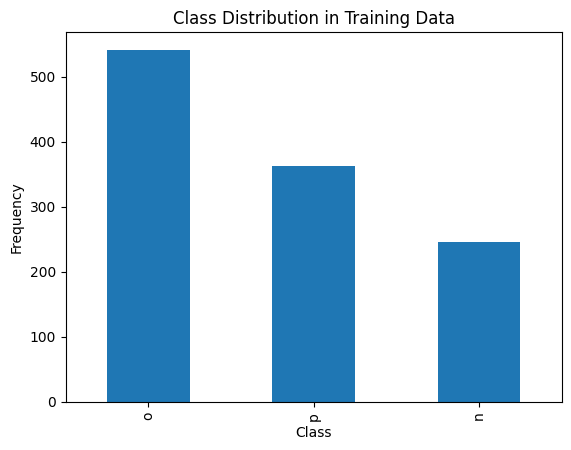

In [23]:
import matplotlib.pyplot as plt

# Assuming 'ManualLabel' is your label column
class_counts = train['ManualLabel'].value_counts()
print(class_counts)
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Data')
plt.show()


In [25]:
from sklearn.utils.class_weight import compute_class_weight

# Get unique labels
unique_labels = train['ManualLabel'].unique()

# Map labels to a binary format if necessary
label_mapping = {label: index for index, label in enumerate(unique_labels)}
mapped_labels = train['ManualLabel'].map(label_mapping)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(mapped_labels),
    y=mapped_labels
)

class_weights_dict = {label_mapping[label]: weight for label, weight in zip(unique_labels, class_weights)}

print(class_weights_dict)


{0: 1.0550964187327823, 1: 1.563265306122449, 2: 0.7079482439926063}
